# Code example to consume LLM via HF API 🤗
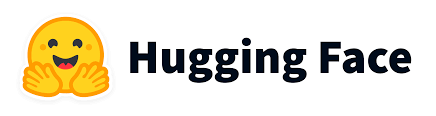

- Notebook based on the ones provided in the [HF Agents Course](https://huggingface.co/learn/agents-course/unit0/introduction)

## Serverless API

In the Hugging Face ecosystem, there is a convenient feature called Serverless API that allows you to easily run inference on many models. There's no installation or deployment required.

To run this notebook, **you need a Hugging Face token** that you can get from https://hf.co/settings/tokens. If you are running this notebook on Google Colab, you can set it up in the "settings" tab under "secrets". Make sure to call it "HF_TOKEN".

You also need to request access to [the Meta Llama models](meta-llama/Llama-3.2-3B-Instruct), if you haven't done it before. Approval usually takes up to an hour.

- [Login docs](https://huggingface.co/docs/huggingface_hub/package_reference/authentication#huggingface_hub.notebook_login)

In [ ]:
# Login into HF

from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient("meta-llama/Llama-3.2-3B-Instruct")

In [ ]:
output = client.chat.completions.create(
    messages=[
        {"role": "user", "content": "The best football player of the history is "},
    ],
    stream=False,
    max_tokens=100,
)

print(output.choices[0].message.content)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


A question that can spark a lot of debate!

There are many great football players throughout history, and opinions on who is the best can vary depending on personal taste, team loyalty, and individual achievements. Here are some of the most commonly cited candidates:

1. Lionel Messi: Regarded by many as the greatest player of all time, Messi has won six Ballon d'Or awards, ten La Liga titles, and four UEFA Champions League titles.
2. Cristiano Ronaldo: A five-time Ballon


## Hugging Face Inference API create Method Parameters:
- [Docs](https://huggingface.co/docs/inference-providers/en/tasks/chat-completion)

### 1. messages (required)


```
messages=[
    {"role": "user", "content": "The best football player of the history is "},
]
```


- Purpose: A list of message objects that form the conversation history
- Structure: Each message has:
  - role: Can be "user", "assistant", or "system"
  - content: The actual text content of the message
Usage: This creates the context for the model to understand the conversation flow and respond appropriately
### 2. stream (optional)
`stream=False`

- Purpose: Controls whether the response is streamed or returned all at once
- Values:
  - True: Returns a streaming response (useful for real-time applications)
  - False: Returns the complete response at once (default)
- Usage: When False, you get the full response immediately; when True, you get chunks of the response as they're generated.

### 3. max_tokens (optional)


```
max_tokens=100
```

- Purpose: Limits the maximum number of tokens in the generated response
- Type: Integer
- Usage: Prevents the model from generating excessively long responses and helps control costs
- Note: This is a maximum limit; the model may generate fewer tokens if it reaches a natural stopping point

###Additional Parameters (not shown in your example but commonly used):

#### 4. temperature (optional)
- Purpose: Controls randomness in the response generation
- Range: 0.0 to 2.0
- Usage:
  - Lower values (0.0-0.3): More deterministic, focused responses
  - Higher values (0.7-1.0): More creative, diverse responses

#### 5. top_p (optional)
- Purpose: Nucleus sampling parameter for controlling response diversity
- Range: 0.0 to 1.0
- Usage: Controls the cumulative probability of tokens considered for generation

#### 6. top_k (optional)
- Purpose: Limits the number of highest probability tokens to consider
- Type: Integer
- Usage: Works with top_p to control response generation

#### 7. stop (optional)
- Purpose: Specifies sequences that should stop the generation
- Type: List of strings
- Usage: Useful for controlling where the response ends

#### 8. frequency_penalty (optional)
- Purpose: Reduces the likelihood of repeating the same information
- Range: -2.0 to 2.0
- Usage: Helps prevent repetitive responses

#### 9. presence_penalty (optional)
- Purpose: Encourages the model to talk about new topics
- Range: -2.0 to 2.0
- Usage: Helps maintain conversation diversity


### Example with more parameters:

In [ ]:
output = client.chat.completions.create(
    messages=[
        {"role": "user", "content": "The best football player of the history is "},
    ],
    stream=False,
    max_tokens=256,
    temperature=0.7,
    top_p=0.9,
    frequency_penalty=0.1,
    presence_penalty=0.1
)
print(output.choices[0].message.content)

A question that sparks debate among football fans!

There is no definitive answer to this question, as opinions on the best football player of all time vary depending on personal taste, team loyalty, and generational differences. However, here are some of the most commonly mentioned candidates:

1. Lionel Messi: Regarded by many as the greatest player of all time, Messi has won numerous accolades, including six Ballon d'Or awards, ten La Liga titles, and four UEFA Champions League titles.
2. Cristiano Ronaldo: A five-time Ballon d'Or winner, Ronaldo has consistently dominated the sport, winning multiple titles with Manchester United, Real Madrid, and Juventus.
3. Diego Maradona: A legendary Argentine midfielder, Maradona led Argentina to World Cup victory in 1986 and is remembered for his exceptional dribbling skills and vision on the pitch.
4. Johan Cruyff: A Dutch football icon, Cruyff is credited with revolutionizing the game with his innovative playing style and philosophical appro